# Oakland Weather predictions

Using data from timeanddate.com weather data is collected in 6 hour intervals 4 times a day.

`temp`       High temperature $^\circ$ F

`templow` Low temperature $^\circ$ F

`baro`    Barometer preasures Hg

`wind`    Wind speed mph

`wd`      Wind direction on a 360$^\circ$  scale (North is 0$^\circ$)

`hum`     Humidity water vapor %

`desc`    Description of weather conditions

In [1]:
import pandas as pd
import numpy as np

weather = pd.read_csv("weather.csv", index_col="date")

In [2]:
weather.head()

,Unnamed: 0,temp,templow,baro,wind,wd,hum,desc
date,,,,,,,,
2009-09-08 12:00:00,0,69.8,69.8,29.85,6.836,300,53,Sunny.
2009-09-08 18:00:00,1,57.2,57.2,29.89,4.350,330,87,Clear.
2009-09-09 00:00:00,2,55.4,51.8,29.91,1.243,320,94,Clear.
2009-09-09 06:00:00,3,NaN,NaN,0.00,0.000,0,0,No weather data available
2009-09-09 12:00:00,4,66.2,64.4,29.97,11.807,300,65,Passing clouds.


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20247 entries, 2009-09-08 12:00:00 to 2023-07-19 12:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20247 non-null  int64  
 1   temp        20155 non-null  float64
 2   templow     20155 non-null  float64
 3   baro        20247 non-null  float64
 4   wind        20247 non-null  float64
 5   wd          20247 non-null  int64  
 6   hum         20247 non-null  int64  
 7   desc        20236 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 1.4+ MB


In [4]:
weather.drop('Unnamed: 0', axis = 1, inplace=True) # Remove extra column

In [5]:
# find the percentage of missing data for each column
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

temp       0.004544
templow    0.004544
baro       0.000000
wind       0.000000
wd         0.000000
hum        0.000000
desc       0.000543
dtype: float64

Less than 1% of the total data has missing values so we can drop those rows so that the zero values in `baro` and `hum` won't effect the machine learning model later on.



In [6]:
weather[weather['desc']=='No weather data available']

,temp,templow,baro,wind,wd,hum,desc
date,,,,,,,
2009-09-09 06:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available
2009-10-02 06:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available
2009-10-02 12:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available
2009-10-02 18:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available
2009-10-03 00:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available
...,...,...,...,...,...,...,...
2019-03-09 18:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available
2021-07-11 00:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available
2021-07-11 06:00:00,NaN,NaN,0.0,0.0,0,0,No weather data available


In [7]:
rows_to_drop = weather[weather['desc']=='No weather data available'].index
weather.drop(rows_to_drop, axis = 0, inplace=True)

In [8]:
weather = weather.ffill()  # fill in the missing desc with the previous one

In [9]:
weather.apply(pd.isnull).sum() # confirm no missing vaules for the model

temp       0
templow    0
baro       0
wind       0
wd         0
hum        0
desc       0
dtype: int64

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20155 entries, 2009-09-08 12:00:00 to 2023-07-19 12:00:00
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     20155 non-null  float64
 1   templow  20155 non-null  float64
 2   baro     20155 non-null  float64
 3   wind     20155 non-null  float64
 4   wd       20155 non-null  int64  
 5   hum      20155 non-null  int64  
 6   desc     20155 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.2+ MB


In [11]:
weather.head()

,temp,templow,baro,wind,wd,hum,desc
date,,,,,,,
2009-09-08 12:00:00,69.8,69.8,29.85,6.836,300,53,Sunny.
2009-09-08 18:00:00,57.2,57.2,29.89,4.350,330,87,Clear.
2009-09-09 00:00:00,55.4,51.8,29.91,1.243,320,94,Clear.
2009-09-09 12:00:00,66.2,64.4,29.97,11.807,300,65,Passing clouds.
2009-09-09 18:00:00,62.6,55.4,29.99,3.728,310,82,Clear.


Confirm the index is on datetime 

In [12]:
weather.index 

Index(['2009-09-08 12:00:00', '2009-09-08 18:00:00', '2009-09-09 00:00:00',
       '2009-09-09 12:00:00', '2009-09-09 18:00:00', '2009-09-10 00:00:00',
       '2009-09-10 06:00:00', '2009-09-10 12:00:00', '2009-09-10 18:00:00',
       '2009-09-11 00:00:00',
       ...
       '2023-07-17 06:00:00', '2023-07-17 12:00:00', '2023-07-17 18:00:00',
       '2023-07-18 00:00:00', '2023-07-18 06:00:00', '2023-07-18 12:00:00',
       '2023-07-18 18:00:00', '2023-07-19 00:00:00', '2023-07-19 06:00:00',
       '2023-07-19 12:00:00'],
      dtype='object', name='date', length=20155)

In [13]:
weather.index = pd.to_datetime(weather.index)

In [14]:
weather.index.year.value_counts().sort_index()

2009     430
2010    1418
2011    1445
2012    1463
2013    1460
2014    1458
2015    1460
2016    1464
2017    1460
2018    1460
2019    1458
2020    1464
2021    1457
2022    1459
2023     799
Name: date, dtype: int64

#### Check for Outliers

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
30.022932 - 0.268635 * 5

28.679757000000002

In [17]:
weather.describe()

,temp,templow,baro,wind,wd,hum
count,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000
mean,60.957360,55.106088,30.022932,8.201392,226.807244,73.209129
std,8.234709,7.858073,0.268635,4.918603,93.436919,14.810201
min,32.000000,28.400000,10.040000,0.000000,0.000000,10.000000
25%,55.400000,50.000000,29.930000,4.350000,170.000000,64.000000
50%,60.800000,55.400000,30.010000,7.457000,270.000000,76.000000
75%,66.200000,60.800000,30.120000,11.807000,290.000000,84.000000
max,102.200000,93.200000,30.580000,38.528000,350.000000,100.000000


<AxesSubplot:xlabel='date'>

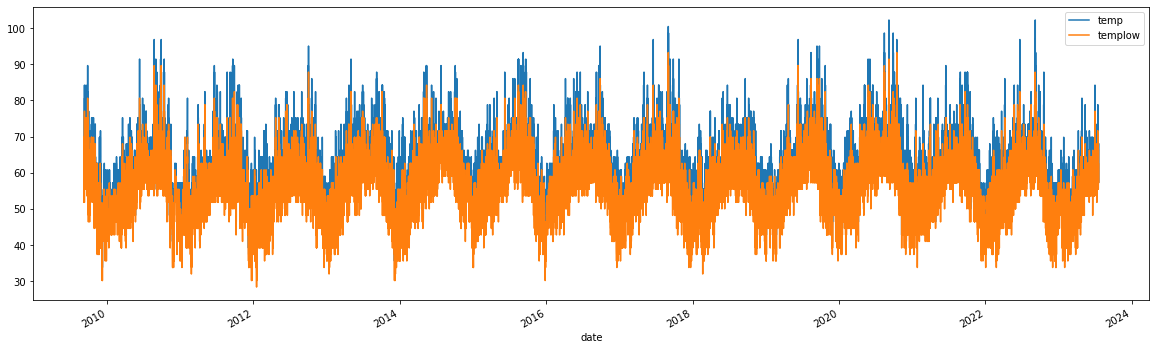

In [18]:
weather[["temp", "templow"]].plot(figsize=(20,6))

<AxesSubplot:xlabel='date'>

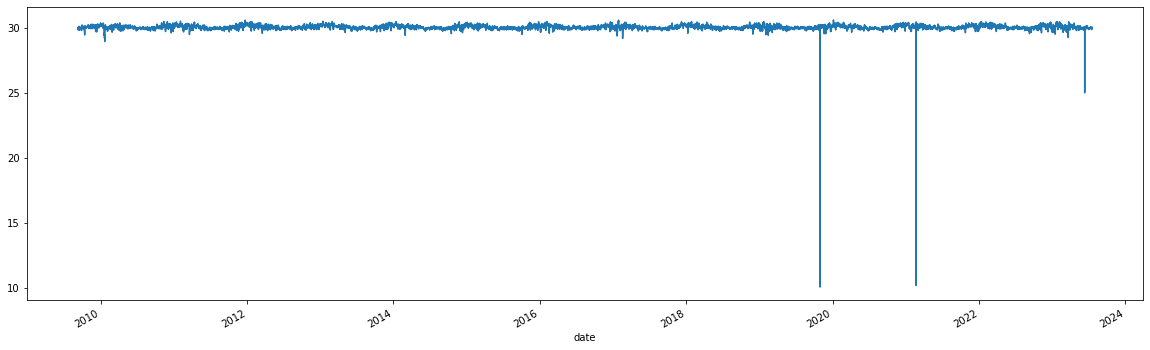

In [19]:
weather["baro"].plot(figsize=(20,6))

The `baro` column has several outliers that will change the machine learning model.

I will set the cut off points for the data to be within 5 standard deviations from the mean `baro`.

In [20]:
cut_off = weather["baro"].mean() - weather["baro"].std()*5  # 28.6

In [21]:
weather[weather["baro"]<cut_off]

,temp,templow,baro,wind,wd,hum,desc
date,,,,,,,
2019-10-30 06:00:00,66.2,50.0,10.04,8.078,120,14,Sunny.
2021-02-21 00:00:00,53.6,46.4,15.23,3.728,320,68,Clear.
2021-02-21 06:00:00,60.8,46.4,10.16,3.728,20,58,Passing clouds.
2023-06-12 00:00:00,57.2,57.2,24.98,13.671,230,79,Passing clouds.


<AxesSubplot:xlabel='date'>

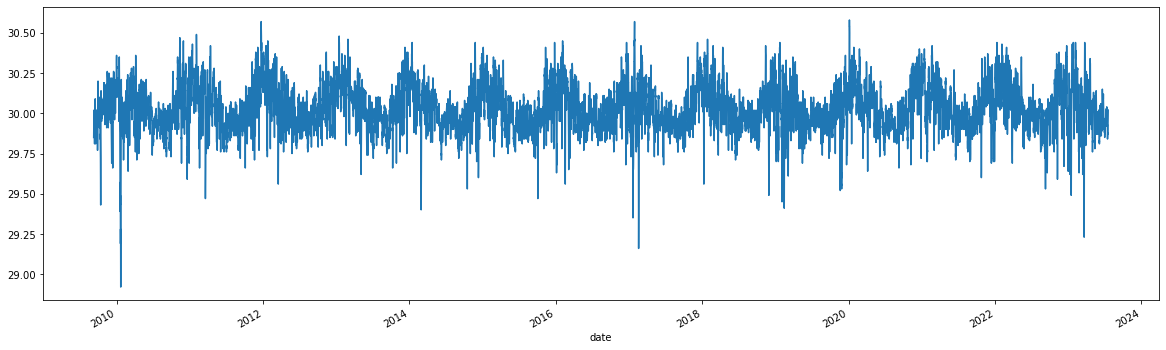

In [22]:
weather[weather["baro"]>cut_off]["baro"].plot(figsize=(20,6))

In [23]:
weather = weather[weather["baro"]>cut_off].copy() # remove the outlier rows 

<AxesSubplot:xlabel='date'>

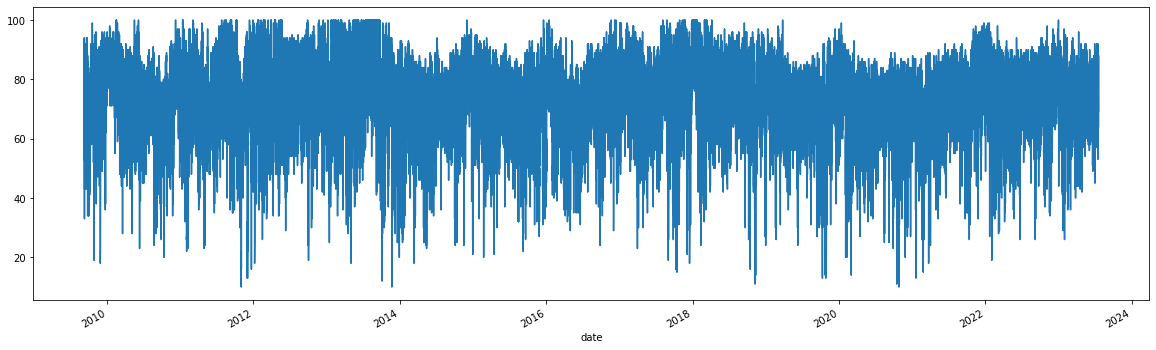

In [24]:
weather["hum"].plot(figsize=(20,6))

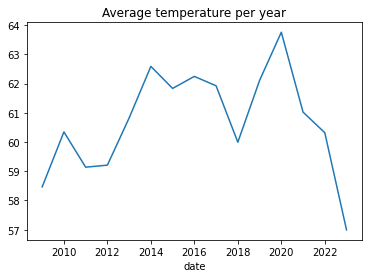

In [25]:
weather.groupby(weather.index.year).apply(lambda x: x["temp"].mean()).plot()
plt.title("Average temperature per year")
plt.show()

In [26]:
weather.corr()

,temp,templow,baro,wind,wd,hum
temp,1.000000,0.864420,-0.336842,0.261363,0.365682,-0.478926
templow,0.864420,1.000000,-0.433100,0.417229,0.420355,-0.352218
baro,-0.336842,-0.433100,1.000000,-0.343758,-0.205696,-0.036001
wind,0.261363,0.417229,-0.343758,1.000000,0.316955,-0.281220
wd,0.365682,0.420355,-0.205696,0.316955,1.000000,-0.137624
hum,-0.478926,-0.352218,-0.036001,-0.281220,-0.137624,1.000000


### Machine Learning model

Establish the target values of predicting the next 6 hours of temperature change.

The Ridge model is selected because we are predicting a quantity with several important features
                Ridge regression also takes into acount the collinearity of the colums


In [27]:
weather["target"] = weather.shift(-1)["temp"] # target is the max temp
weather = weather.ffill()  # fill in the last row that has NaN values

In [28]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [29]:
predictors = weather.columns[~weather.columns.isin(['desc', 'target'])] # all columns except desc and target
# 'baro', 'wind', 'wd', 'hum' 

For the backtesting we set the predictions to 

start every 2 year $\approx$ 3000 data points 

step every month $\approx$ 120 data points

In [30]:
def backtest(weather, model, predictors, start=3000, step=120):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)


In [31]:
predictions = backtest(weather, rr, predictors)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mean_absolute_error(predictions["actual"], predictions["prediction"])

4.4095389381203285

In [33]:
predictions["diff"].mean()

4.409538938120362

In [34]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
date,,,
2020-07-07 00:00:00,82.4,57.554734,24.845266
2017-10-24 00:00:00,87.8,64.811926,22.988074
2021-01-18 00:00:00,80.6,57.798635,22.801365
2020-03-02 00:00:00,71.6,49.559041,22.040959
2013-10-04 00:00:00,80.6,58.891248,21.708752
...,...,...,...
2012-09-19 18:00:00,55.4,55.401069,0.001069
2021-09-09 18:00:00,62.6,62.601049,0.001049
2011-12-29 06:00:00,55.4,55.400745,0.000745


<AxesSubplot:xlabel='date'>

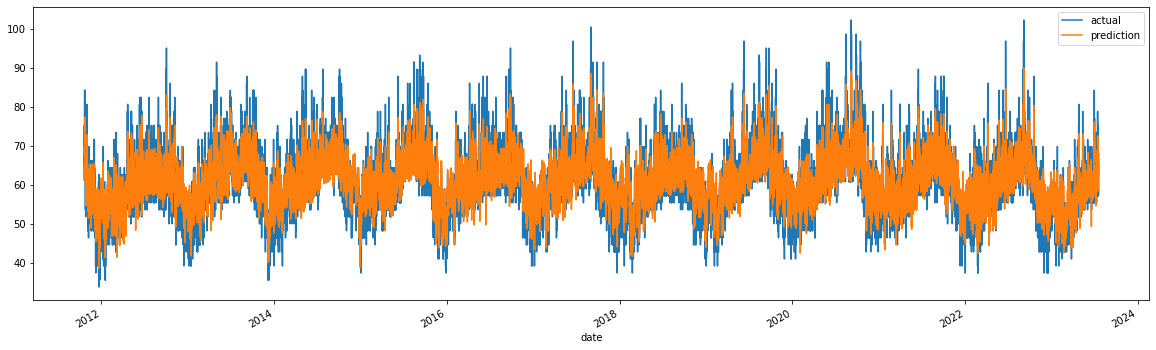

In [35]:
predictions[['actual', 'prediction']].plot(figsize=(20,6))

<AxesSubplot:>

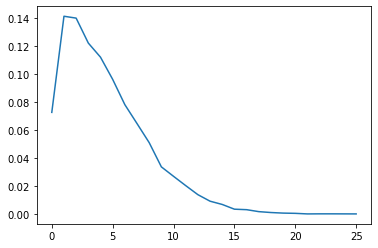

In [36]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [37]:
pd.Series(rr.coef_, index=predictors)

temp       0.827350
templow   -0.004590
baro      -5.560837
wind      -0.364690
wd        -0.012994
hum        0.102430
dtype: float64

### Add more predictors

Introduce rolling means

In [38]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [4, 28]  # every day 4    every week 28
for horizon in rolling_horizons:
    for col in ['temp', 'templow']:
        weather = compute_rolling(weather, horizon, col)

In [39]:
weather = weather.iloc[28:,:] # remove the NaN created from rolling averages
weather = weather.fillna(0) # fills last couple of rows that have NaN

In [40]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in predictors:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)


In [41]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.410056043600628

In [42]:
mean_squared_error(predictions["actual"], predictions["prediction"])

30.932542171459783

In [43]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
date,,,
2020-07-07 00:00:00,82.4,57.533551,24.866449
2017-10-24 00:00:00,87.8,64.845980,22.954020
2021-01-18 00:00:00,80.6,57.799768,22.800232
2020-03-02 00:00:00,71.6,49.616257,21.983743
2013-10-04 00:00:00,80.6,58.931664,21.668336
...,...,...,...
2018-01-31 00:00:00,57.2,57.202339,0.002339
2021-03-11 12:00:00,53.6,53.598350,0.001650
2022-07-27 12:00:00,62.6,62.598504,0.001496


<AxesSubplot:>

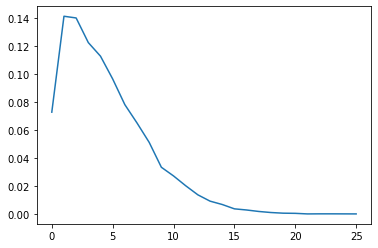

In [44]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

Adding rolling means ended up not changing the model that much


## Further Steps

Try different models such as randomforest, a more complicated model

Adjust the predictors 
*    For example I originally ran the model with just the high and low temperatures `temp` `templow` and the mean squared error was 5.05 but after adding in `baro`, `wind`, `wd`, `hum` the mean squared error reduced to 4.40
